<a href="https://colab.research.google.com/github/Isaacguto02/Fenomenos-Bioelectricos/blob/main/Copy_of_FBAct_1_Programacion_simbolica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulacion del potencial de GHK en lenguaje simbolico matematico

Mediante este laboratorio descubrira la deficion de variables matematicas en lenguaje simbolico para introducir las ecuaciones y funciones en el tiempo que permiten calcular el potencial de Nernst y el potencial de Goldman-Hodgkin-Katz.

La actividad consiste en escribir de manera correcta el valor de la variable o de la funcion faltante dentro de una celda remplazando el valor `None`. Ejemplo:

In [2]:
K_o = 125
K_i = 30

# Definal el valor de relacion de concentracion de potacio extracelular
# respecto a la concentracion intracelular del mismo ion.

dKio = K_o/K_i
dKio

4.166666666666667

Resultado esperado: `dKio = K_o/K_i`

Tabla 1 de valores de concentracion.

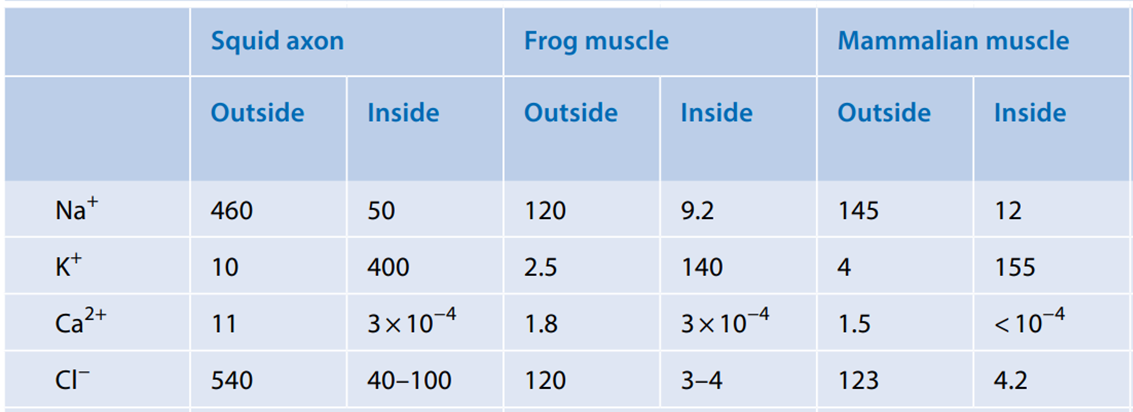

**Nota**: considere Cl=100 y Cl=4 para el calamar y la rana respectivamente.

## 1. Instalacion de la libreria SymPy

La celda solo instalara la libreria si es necesario

In [3]:
try:
  import sympy
  print('SymPy fue importado con exito')
except:
  !pip install sympy

SymPy fue importado con exito


## 2. Importar modulos requeridos para definicion de variables simbolicas

Seleccionar alguna de las 2 opciones disponibles:

    * Symbol <- permite definir solo una variable simbolica matematica
    * symbols <- permite definir varias variables simbolicas a la *vez*

In [4]:
from sympy import Symbol
from sympy import log

Definicion de variables simples y de metodo de representacion

In [5]:
x = Symbol('x')
x

x

In [6]:
y = Symbol('y')
y

y

In [7]:
z = x**2+y**3+3*x*y+2*y-3*x

In [8]:
z

x**2 + 3*x*y - 3*x + y**3 + 2*y

Solucion de operaciones con variables simbolicas mediante la asignacion de valores numericos a las variables simbolicas matematicas

In [9]:
z = 3*x+y
z

3*x + y

In [10]:
z.subs({x:3,y:1})

10

## 3. Simulacion del potencial de Nernst del Potasio del musculo de una rana

Definicion de las constantes de la ecuacion

In [11]:
R = Symbol('R')
T = Symbol('T')
F = Symbol('F')

Definicion de variables para calcular el potencial de Nernst del K

In [12]:
K_in = Symbol('c_i,K')
K_out = Symbol('c_o,K')
K_z = Symbol('z_K')

Definicion de la funcion del potencial de Nernst del K

In [13]:
V_K = -((R*T)/(K_z*F))*(log(K_in/K_out))
V_K

-R*T*log(c_i,K/c_o,K)/(F*z_K)

Resultado esperado.


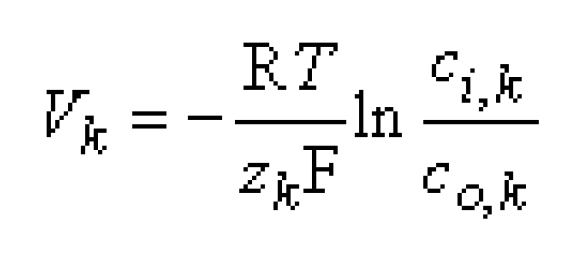

Asignacion de valores numericos a las variables de concentracion de K

In [14]:
V_K.subs({R:8.315,T:300,K_z:1,F:9.648*(10**4),K_in:150,K_out:5.5})

-0.0854740425480344

Obtenga el potencial de Nernst del Sodio y del Cloro del musculo de rana con los datos de la Tabla 1.

Recuerde definir las variables necesarias, mostrar la ecuacion en lenguaje simbolico en una celda, y el resultado de la operacion en la siguiente celda.

In [15]:
Na_in = Symbol('c_i,Na')
Na_out = Symbol('c_o,Na')
Na_z = Symbol('z_Na')

V_Na = -((R*T)/(Na_z*F))*(log(Na_in/Na_out))
V_Na

-R*T*log(c_i,Na/c_o,Na)/(F*z_Na)

In [16]:
V_Na.subs({R:8.315,T:300,Na_z:1,F:9.648*(10**4),Na_in:9.2,Na_out:120})

0.0664033484804584

In [17]:
Cl_in = Symbol('c_i,Cl')
Cl_out = Symbol('c_o,Cl')
Cl_z = Symbol('z_Cl')

V_Cl = -((R*T)/(Cl_z*F))*(log(Cl_in/Cl_out))
V_Cl

-R*T*log(c_i,Cl/c_o,Cl)/(F*z_Cl)

In [18]:
V_Cl.subs({R:8.315,T:300,Cl_z:-1,F:9.648*(10**4),Cl_in:4,Cl_out:120})

-0.0258550995024876*log(30)

## 4. Definicion de la ecuacion del potencial de GHK

Utilice los siguientes valores de permeabilidad para simular el potencial de GHK de un:

Axon de calamar:
* P_Na=0.04
* P_K=1
* P_Cl=0.45

Musculo de rana
* P_Na=2*(10^(-8))
* P_K=2*(10^(-6))
* P_Cl=4*(10^(-6))

Musculo de un mamifero
* P_Na=0.04
* P_K=1
* P_Cl=0.45



In [19]:
# Define variables simbólicas
P_Na = sympy.Symbol('P_Na')
P_K = sympy.Symbol('P_K')
P_Cl = sympy.Symbol('P_Cl')

Na_in = sympy.Symbol('Na_intra')  # Concentration intracelular de Na
Na_out = sympy.Symbol('Na_extra')   # Concentración extracelular de Na
K_in = sympy.Symbol('K_intra')  # Concentración intracelular de K
K_out = sympy.Symbol('K_extra')   # Concentración extracelular de K
Cl_in = sympy.Symbol('Cl_intra')  # Concentración intracelular de Cl
Cl_out = sympy.Symbol('Cl_extra')  # Concentración extracelular de Cl

# Constantes físicas
R = sympy.Symbol('R')  # Constante de gas
T = sympy.Symbol('T')  # Temperatura absoluta
F = sympy.Symbol('F')  # Constante de Faraday

# Define la función del potencial GHK
V_axon = (R * T / F) * sympy.log((P_Na * Na_out + P_K * K_out + P_Cl * Cl_in) /
                              (P_Na * Na_in + P_K * K_in + P_Cl * Cl_out))

# Imprime la función
print(V_axon)

V_axon

R*T*log((Cl_intra*P_Cl + K_extra*P_K + Na_extra*P_Na)/(Cl_extra*P_Cl + K_intra*P_K + Na_intra*P_Na))/F


R*T*log((Cl_intra*P_Cl + K_extra*P_K + Na_extra*P_Na)/(Cl_extra*P_Cl + K_intra*P_K + Na_intra*P_Na))/F

In [20]:
# Utilice este espacio para definir los valores de las variables y resolver la funcion
V_axon.subs({R:8.315,T:300,F:9.648*(10**4),P_Na:0.04,Na_out:460,P_K:1,
                     K_out:10,P_Cl:0.45,Cl_in:100,Na_in:50,K_in:400,Cl_out:540})

-0.0561915698366686

Repita el proceso de las 2 celdas anteriores para obtener el potencial de GHK de un musculo de rana y uno de un mamifero.

In [21]:
V_musculo_rana = (R * T / F) * sympy.log((P_Na * Na_out + P_K * K_out + P_Cl * Cl_in) /
                              (P_Na * Na_in + P_K * K_in + P_Cl * Cl_out))
V_musculo_rana

R*T*log((Cl_intra*P_Cl + K_extra*P_K + Na_extra*P_Na)/(Cl_extra*P_Cl + K_intra*P_K + Na_intra*P_Na))/F

In [22]:
V_musculo_rana.subs({R:8.315,T:300,F:9.648*(10**4),P_Na:2*(10^(-8)),Na_out:120,P_K:2*(10^(-6)),
                     K_out:2.5,P_Cl:4*(10^(-6)),Cl_in:4,Na_in:9.2,K_in:140,Cl_out:120})

-0.0313328557024812

In [23]:
V_musculo_mamifero = (R * T / F) * sympy.log((P_Na * Na_out + P_K * K_out + P_Cl * Cl_in) /
                              (P_Na * Na_in + P_K * K_in + P_Cl * Cl_out))
V_musculo_mamifero

R*T*log((Cl_intra*P_Cl + K_extra*P_K + Na_extra*P_Na)/(Cl_extra*P_Cl + K_intra*P_K + Na_intra*P_Na))/F

In [47]:
V_musculo_mamifero.subs({R:8.315,T:300,F:9.648*(10**4),P_Na:0.04,Na_out:145,P_K:1,
                     K_out:4,P_Cl:0.45,Cl_in:4.2,Na_in:12,K_in:155,Cl_out:123})

-0.0747811786299394

## 5. Genere variaciones en las concentraciones ionicas en el tiempo para describir el comportamiento observado

Las variables de concentracion ionica estan dadas como valores estaticos en la Tabla 1. Agregue una variacion sinoidal de 10% del valor minimo de concentracion ionica en ambas terminales de la membrana celular y genere una simulacion por 2 periodos de onda. Introduzca esta variacion al canal de Na del axon de calamar. Grafique su resultado.

Vin = sin(2*pi*t*f/T)

VNa = ENa*Vin

donde: f=60hz, T=1/f y t=vector tiempo

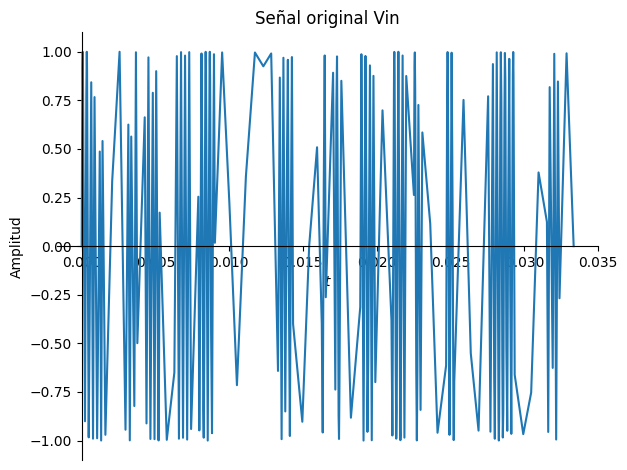

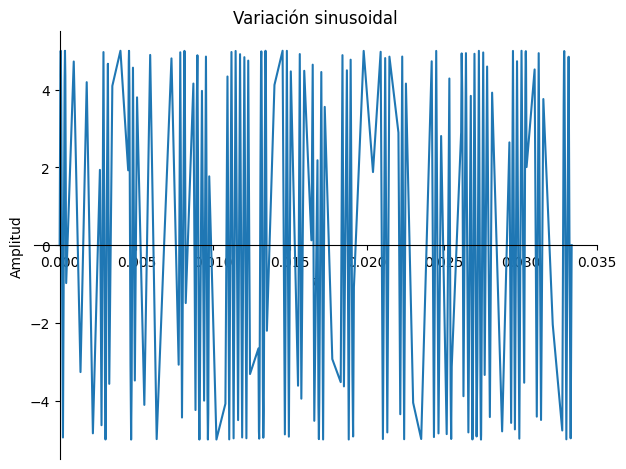

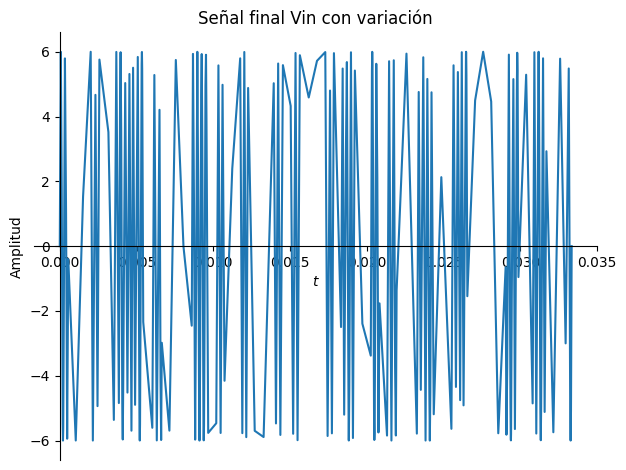

In [73]:
# Definición de variables
Vin = sympy.Symbol('Vin')
tiempo = sympy.Symbol('t')
f = sympy.Symbol('f')

# Amplitud de la variacion sinoidal de 10% del valor minimo de concentracion de
#sodio en ambas terminales de la membrana celular que es 50
A = 5

# Señal original
Vin_original = sympy.sin(2*sympy.pi*tiempo*f/periodo_muestreo)

# Variación sinusoidal
Vin_variacion = A * sympy.sin(2*sympy.pi*tiempo*f/periodo_muestreo)

# Señal con la variación añadida
Vin_final = Vin_original + Vin_variacion

# Visualización de las señales
# 2 periodos de onda con un periodo de muestreo de 1/60,
#por lo que dos periodos irían desde 0 hasta 2/60
sympy.plot(Vin_original.subs({f: 60, periodo_muestreo: 1/60}), (tiempo, 0, 2/60),
           title="Señal original Vin", ylabel="Amplitud", label="Tiempo (s)")
sympy.plot(Vin_variacion.subs({f: 60, periodo_muestreo: 1/60}), (tiempo, 0, 2/60),
           title="Variación sinusoidal", ylabel="Amplitud", label="Tiempo (s)")
sympy.plot(Vin_final.subs({f: 60, periodo_muestreo: 1/60}), (tiempo, 0, 2/60),
           title="Señal final Vin con variación", ylabel="Amplitud", label="Tiempo (s)")